In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('../light_mode.mplstyle')

import sys
sys.path.append('../src/')

from sim import Init, Grid
import constants
from helper import *

In [2]:
########################################################
#                 Simulation Parameters                #
########################################################

Nside     = 256               #number of cells per side
nH_init   = 1e2               #cm^-2
vx_init   = 0                 #cm/s
vy_init   = 0                 #cm/s
temp_init = 100               #K
boxsize   = 10*constants.pc   #cm
Ndot      = 2e48              #photons/s
c_red     = 6e-4*constants.c  #cm/s
time_sim  = 100*constants.kyr #s   
x_init    = 0.001

rho_init  = nH_init*constants.mH
p_init    = nH_init*constants.kB*temp_init

In [3]:
########################################################
#                 Define Units of Box                  #
########################################################

unit = SimpleNamespace(
    length = boxsize,
    time   = constants.kyr,
    mass   = constants.Msol,
    phot   = 1e48
)
unit.density = unit.mass/unit.length**2
unit.vel = unit.length/unit.time
unit.energy_density = unit.density*unit.vel**2

In [4]:
########################################################
#                  Initialize & Run                    #
########################################################

grid = Grid(N=Nside, C=0.4, bc_typ=[NEU, NEU], rsolve=HLL, sloper=MONCEN, c_red=c_red)

with Init(grid) as grid:
    
    grid.w[RHO] = rho_init/unit.density
    grid.w[VX]  = vx_init/unit.vel
    grid.w[VY]  = vy_init/unit.vel
    grid.w[P]   = p_init/unit.energy_density
    grid.w[ION] = x_init*rho_init/unit.density
    grid.urad[NPHOT] = 1e-3

for i in range(100):
    
    grid.inject([0.5, 0.5], Ndot/(unit.phot/unit.time)/(grid.dx)**2)
    ### fluid + radiation + thermochemistry
    grid.step(unit)

Ion Fraction Failed: Halving time step and starting over
Ion Fraction Failed: Halving time step and starting over
Ion Fraction Failed: Halving time step and starting over
Ion Fraction Failed: Halving time step and starting over


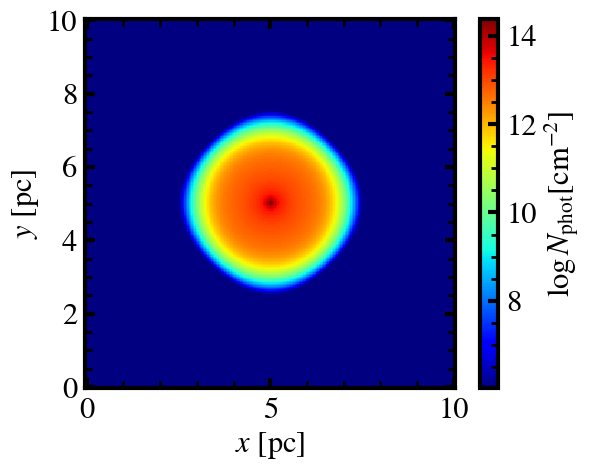

In [5]:
plt.pcolormesh(grid.x*unit.length/constants.pc, grid.y*unit.length/constants.pc, 
               np.log10(grid.urad[NPHOT]*unit.phot/(unit.length)**2), cmap='jet')
plt.gca().set_aspect(True)
cbar = plt.colorbar()

# plt.title(r'$t = %.3g~{\rm yr}$' % (grid.t*unit.time/const.yr))
plt.xlabel(r'$x$ [${\rm pc}$]')
plt.ylabel(r'$y$ [${\rm pc}$]')
cbar.set_label(r'$\log N_{\rm phot} [\rm cm ^{-2}]$')

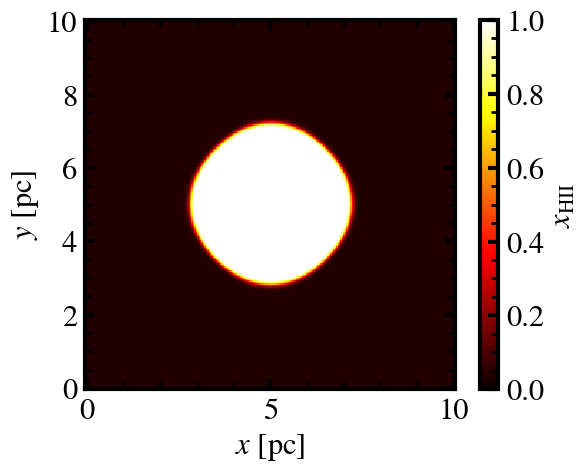

In [6]:
plt.pcolormesh(grid.x*unit.length/constants.pc, grid.y*unit.length/constants.pc, grid.u[ION]/grid.u[RHO], cmap='hot', 
               vmin=0, vmax=1)
plt.gca().set_aspect(True)
cbar = plt.colorbar()

# plt.title(r'$t = %.3g~{\rm yr}$' % (grid.t*unit.time/const.yr))
plt.xlabel(r'$x$ [${\rm pc}$]')
plt.ylabel(r'$y$ [${\rm pc}$]')
cbar.set_label(r'$x_{\rm HII}$')

In [11]:
# plt.pcolormesh(grid.x*unit.length/constants.pc, grid.y*unit.length/constants.pc, np.log10(grid.u[RHO] / unit.density), cmap='hot')
# plt.gca().set_aspect(True)
# cbar = plt.colorbar()

# # plt.title(r'$t = %.3g~{\rm yr}$' % (grid.t*unit.time/const.yr))
# plt.xlabel(r'$x$ [${\rm pc}$]')
# plt.ylabel(r'$y$ [${\rm pc}$]')
# cbar.set_label(r'$x_{\rm HII}$')